# Udemy Course: Python A-Z
## Section 6 - Advanced Visualization: PROJECT | Movie Ratings

Python Programming A-Z™ 

© Kirill Eremenko

[Super Data Science](http://www.superdatascience.com)

---
**Project Instructions**

The movie reviews website was very happy with your deliverable for the previous assignment and now they have a new request for you.

The previous consultant had created a chart for them which is illustrated on the next slide. However the Python code used to create the diagram has since been lost and cannot be recovered. 

Your task is to come up with the code that will re-create the same chart making it look as close as possible to the original. A new dataset has been supplied. 

**image to be recreated:**
![To be replicated](image-section-6.png "Title")


---

In [1]:
#Jupyter notebook notes
# to get a delimiter line 
#1. Turn cell to markdown => esc + M
#2. Then type ---
#to execute => SHIFT + ENTER

In [39]:
#let's import all our packages
import pandas as pd
import numpy as np
import os
#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
#check the current working directory
os.getcwd()

'/Users/yinka_ola/Google Drive/_Udemy/Phython A-Z/Section 6'

In [41]:
#load the dataset

mov = pd.read_csv('P4-Section6-Homework-Dataset.csv', encoding = 'latin1')
mov

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
9,Friday,"Henry Joost, Ariel Schulman",horror,Paranormal Activity 3,21/10/2011,Paramount Pictures,218.8,5.0,207,5.9,2.90,103,49.8,202,4040.0,84,104.0,50.2


In [42]:
#let's explore our dataset
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [43]:
mov.tail()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
603,Wednesday,William Friedkin,horror,The Exorcist,26/12/1973,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
605,Friday,James Cameron,sci-fi,Avatar,18/12/2009,Fox,"3,090.40",237.0,"2,788",7.9,3.78,"2,027.50",72.7,"2,551",1076.4,162,760.5,27.3
606,Wednesday,James Cameron,drama,Titanic,17/12/1997,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1
607,Friday,"George Cukor, Victor Fleming, Sam Wood",drama,Gone with the Wind,15/12/1939,MGM,"6,846.70",3.9,400.2,8.2,3.83,201.5,50.4,396.3,10161.5,238,198.7,49.6


In [44]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [45]:
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


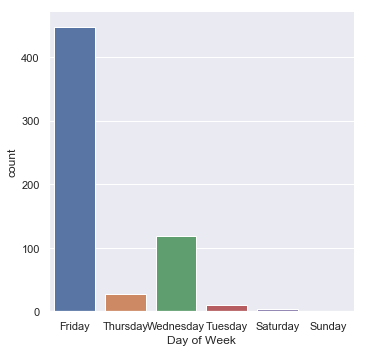

In [46]:
#let's visualize the data
vis1 = sns.factorplot(data = mov, x='Day of Week', kind = 'count', size =5)

**Insight**

Majority of the movies were launched on Friday with the least being on Monday, but no movie was released on a Monday

In order to acheive our goal, we need to filter our dataset

---

In [47]:
#let's investigate the studios and genre
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [48]:
len(mov.Studio.unique())

36

In [49]:
#genre
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [50]:
len(mov.Genre.unique())

15

In [51]:
# we need to filter the above to get the data that interest us.
#the best way is to crete an array
#mov2 = mov[mov.Studio == 'Fox' | mov.Studio == 'Buena Vista Studios']

# Filter the dataframe by studio
#mov3 = mov2[(mov2.Studio == 'Buena Vista Studios') | (mov2.Studio == 'Fox') | (mov2.Studio == 'Paramount Pictures') | (mov2.Studio == 'Sony') | (mov2.Studio == 'Universal') | (mov2.Studio == 'WB')]

# Filter the dataframe by genre
genre_filters = [ 'action', 'adventure', 'animation', 'comedy', 'drama']
mov2 = mov[mov.Genre.isin(genre_filters)]

In [52]:
mov2.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [53]:
# Filter the dataframe by studio
studio_filters = [ 'Buena Vista Studios', 'Fox', 'Paramount Pictures',  'Sony', 'Universal','WB' ]
mov3 = mov2[mov2.Studio.isin(studio_filters)]

In [54]:
mov3.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [55]:
print(mov3.Studio.unique())

['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


In [56]:
len(mov3)

423

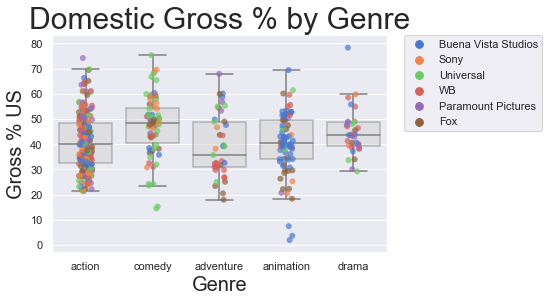

In [57]:
#let's re-create the plot above

# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data=mov3, x='Genre', y='Gross % US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5) #transparency

# Add in points to show each observation
sns.stripplot(x='Genre', y='Gross % US', data=mov3, jitter=True, size=6, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
